In [ ]:
# Problem Statement
# A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

# Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_final = pd.concat([df_train,df_test])

In [4]:
print(df_final)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
233594  1006036  P00118942      F  26-35          15             B   
233595  1006036  P00254642      F  26-35          15             B   
233596  1006036  P00031842      F  26-35          15             B   
233597  1006037  P00124742      F  46-50           1             C   
233598  1006039  P00316642      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1            

In [5]:
df_final.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
df_final = df_final.drop(['User_ID'], axis = 1)

In [7]:
# handling categorial variable

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df_final[['Gender','City_Category']] = oe.fit_transform(df_final[['Gender','City_Category']])
df_final


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0.0,0-17,10,0.0,2,0,3,NaN,NaN,8370.0
1,P00248942,0.0,0-17,10,0.0,2,0,1,6.0,14.0,15200.0
2,P00087842,0.0,0-17,10,0.0,2,0,12,NaN,NaN,1422.0
3,P00085442,0.0,0-17,10,0.0,2,0,12,14.0,NaN,1057.0
4,P00285442,1.0,55+,16,2.0,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0.0,26-35,15,1.0,4+,1,8,NaN,NaN,NaN
233595,P00254642,0.0,26-35,15,1.0,4+,1,5,8.0,NaN,NaN
233596,P00031842,0.0,26-35,15,1.0,4+,1,1,5.0,12.0,NaN
233597,P00124742,0.0,46-50,1,2.0,4+,0,10,16.0,NaN,NaN


In [8]:
df_final.isnull().sum()

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809


In [12]:
# Missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
df_final[['Product_Category_2',	'Product_Category_3',	'Purchase']] = imputer.fit_transform(df_final[['Product_Category_2',	'Product_Category_3',	'Purchase']])

,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  float64
 2   Age                         783667 non-null  object 
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  float64
 5   Stay_In_Current_City_Years  783667 non-null  object 
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    783667 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 71.7+ MB


In [16]:
df_final['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
df_final['Age'] = df_final['Age'].map({'0-17':0,'55+': 1, '26-35':2, '46-50' : 3, '51-55': 4, '36-45': 5, '18-25': 6})

In [27]:
df_final['Stay_In_Current_City_Years'] = df_final['Stay_In_Current_City_Years'].astype(str).str.replace('[^0-9]', '', regex = True).astype(int)

In [31]:
df_final['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0])

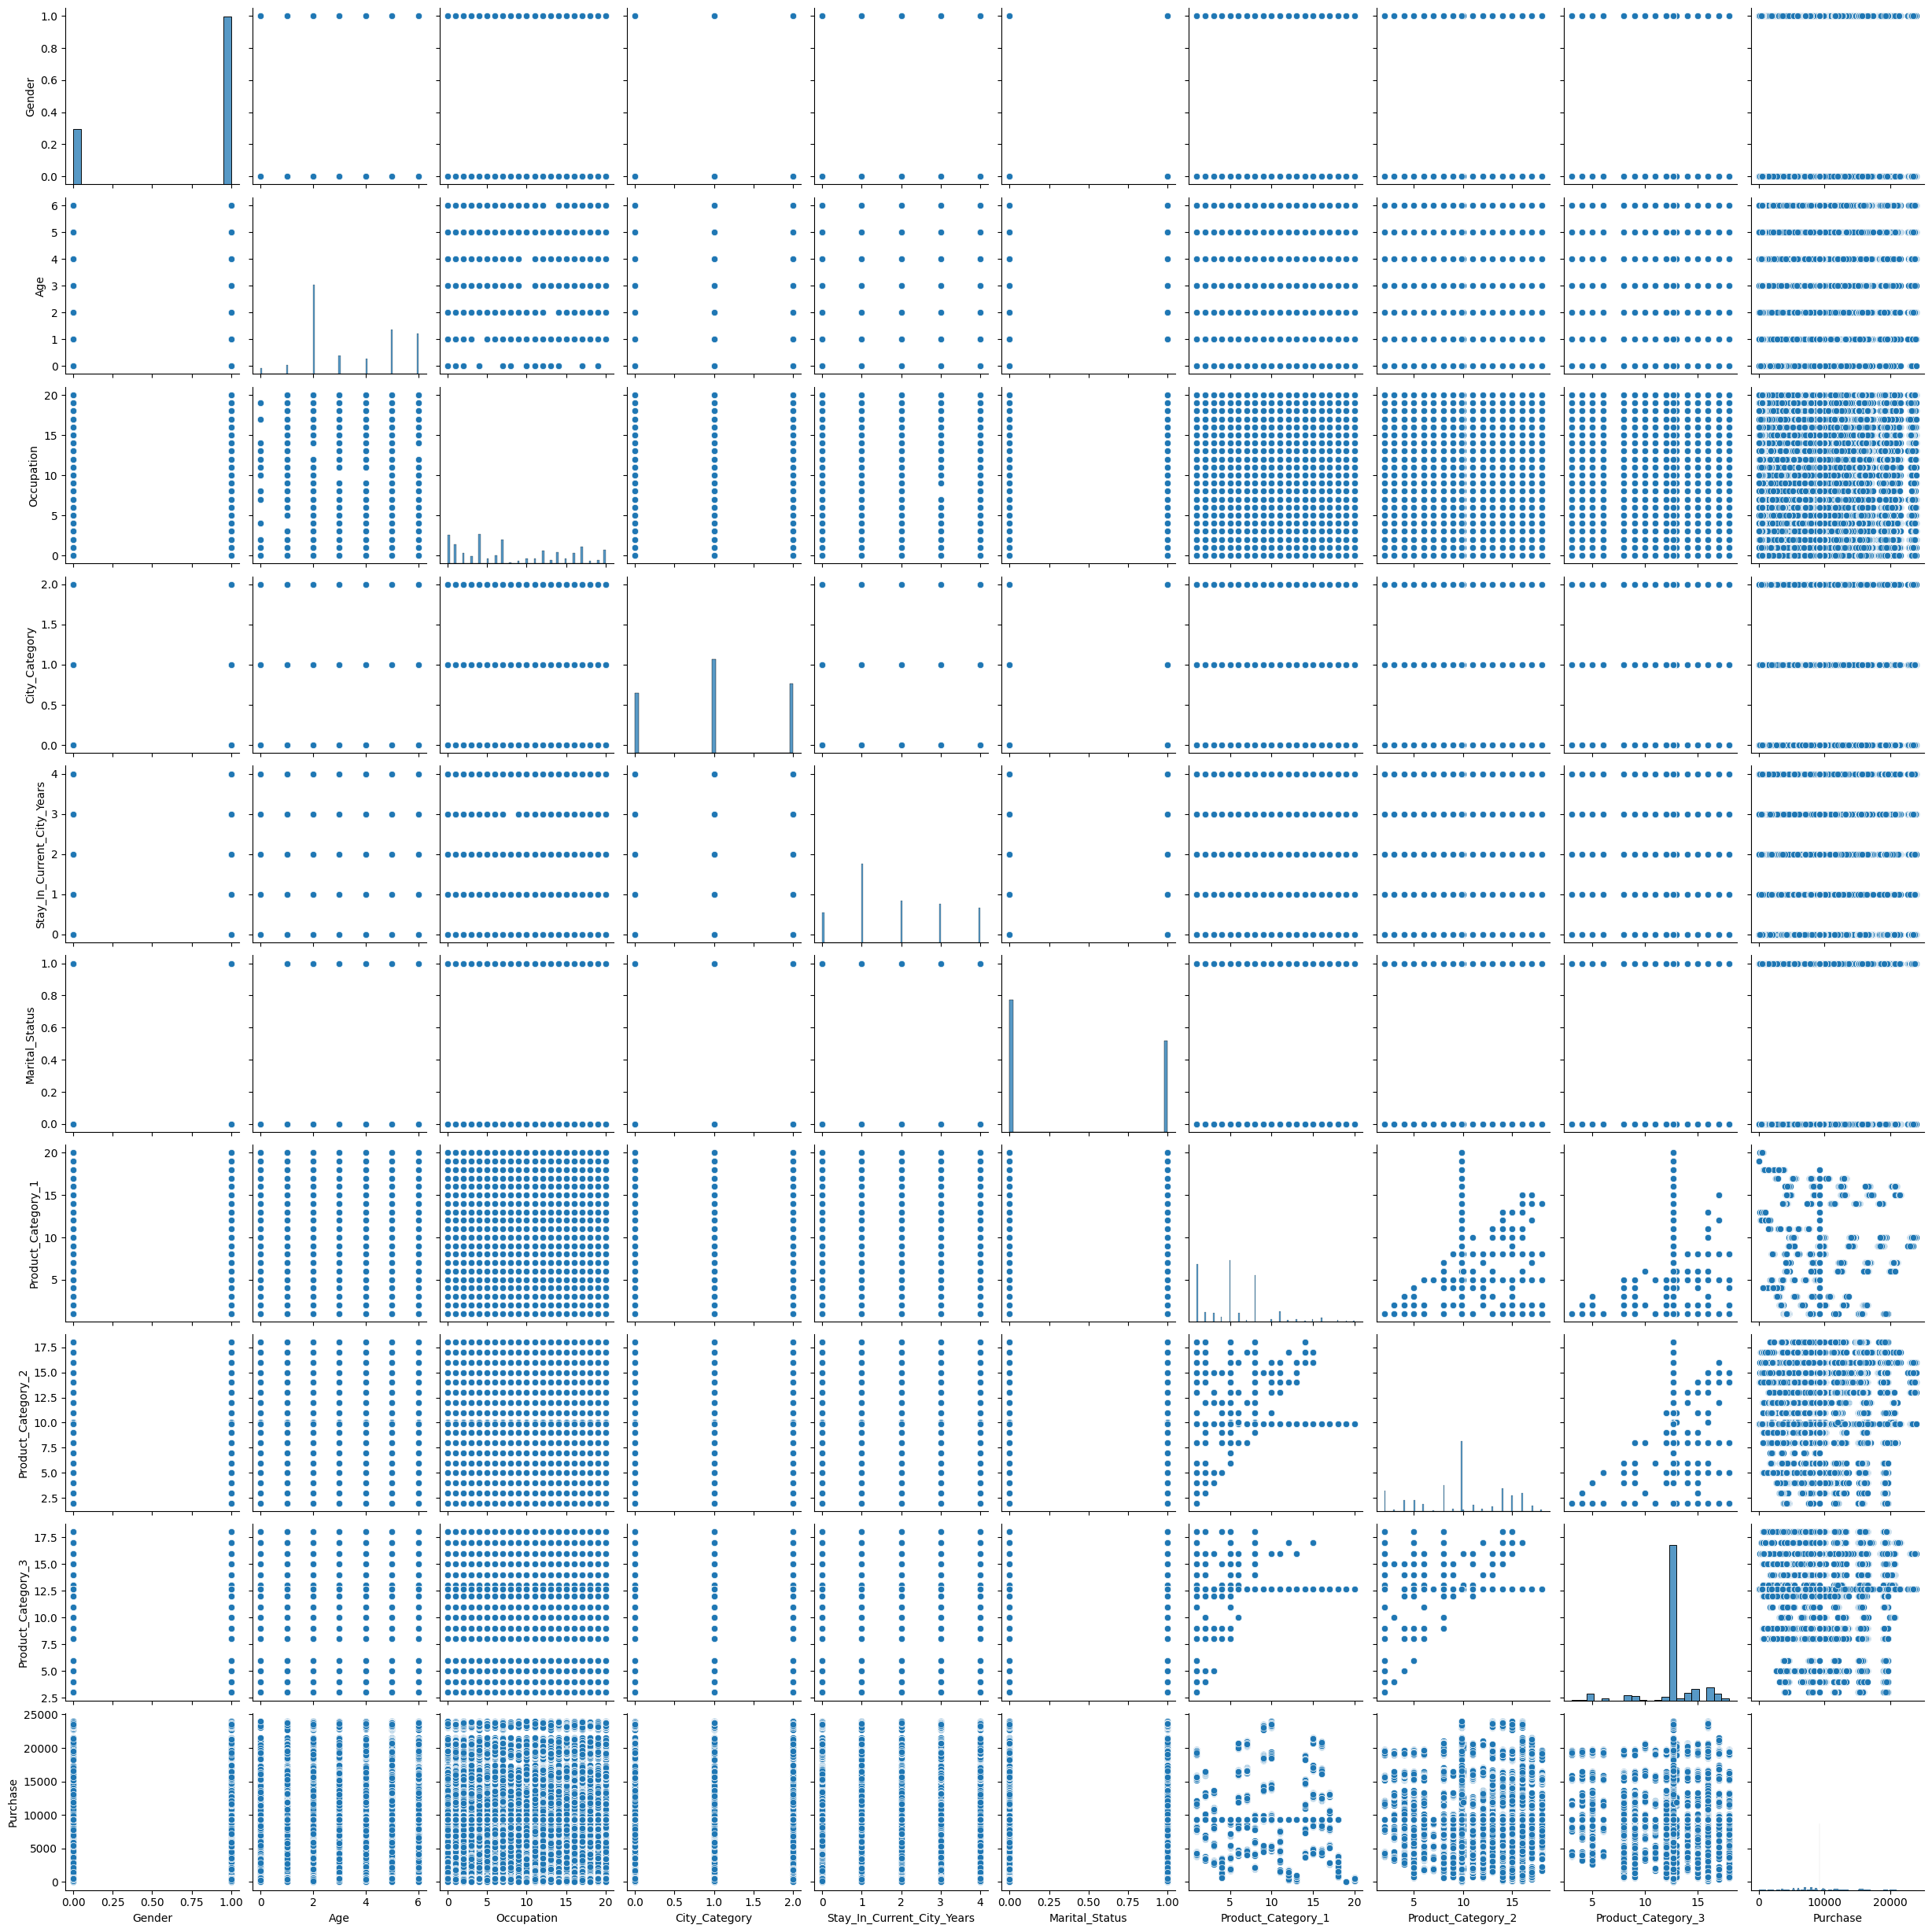

In [32]:
sns.pairplot(df_final)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

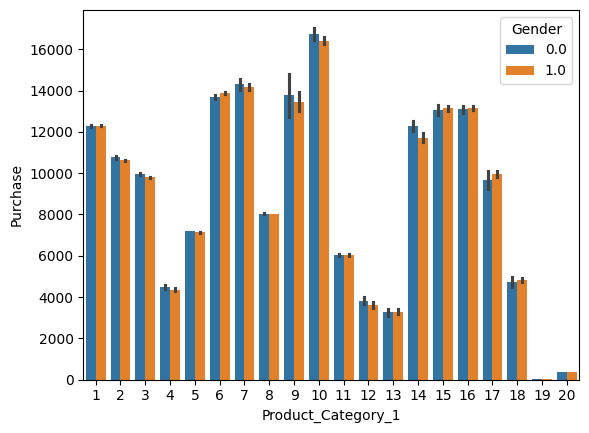

In [36]:
sns.barplot(x ='Product_Category_1',y = 'Purchase', hue = 'Gender', data = df_final)

In [ ]:
# # Conclusion

# We can observe that:

# 1.Across most product categories, men tend to have a higher average purchase amount compared to women.
# 2.There are some product categories where the difference in purchase amount between men and women is more pronounced than others.
# 3. This pattern suggests there could be gender-based preferences or purchase behaviors that influence how much people spend on different product categories.


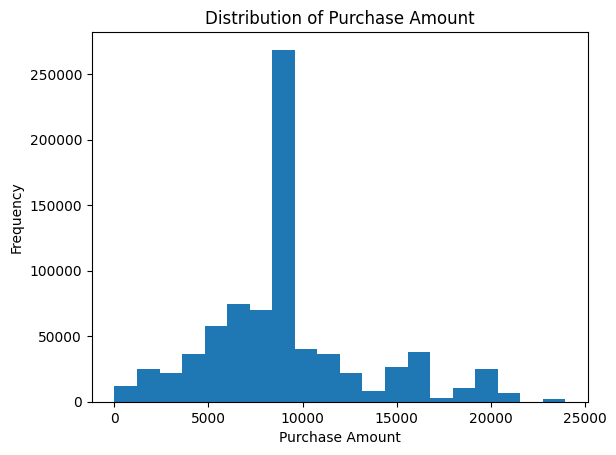

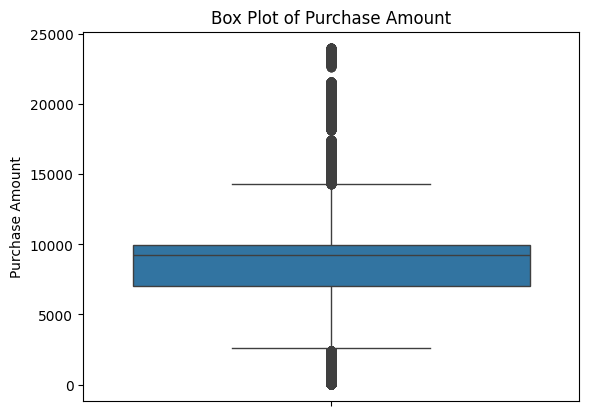

In [37]:
# Histogram
plt.hist(df_final['Purchase'], bins=20)
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Amount')
plt.show()

# Box Plot
sns.boxplot(y='Purchase', data=df_final)
plt.ylabel('Purchase Amount')
plt.title('Box Plot of Purchase Amount')
plt.show()

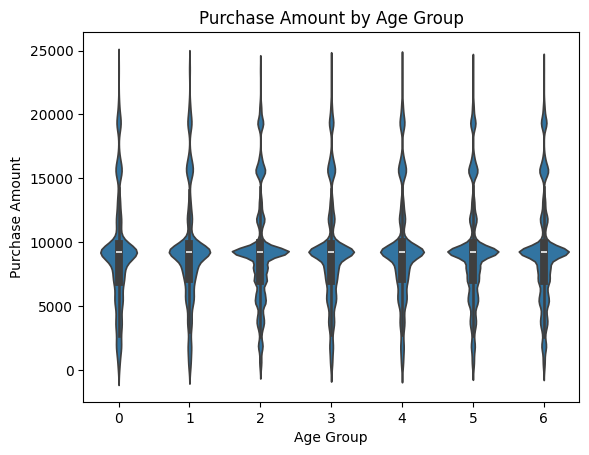

In [38]:
sns.violinplot(x='Age', y='Purchase', data=df_final)
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.title('Purchase Amount by Age Group')
plt.show()